# FINDING HEAVY TRAFFIC INDICATORS on I-94

 Interstate 94 (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States.
    
 The aim of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be time of the week, weather type, time of the day, etc. 

## The I-94 Traffic Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

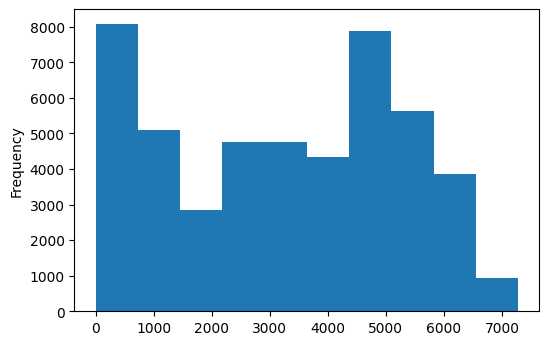

In [92]:
df['traffic_volume'].plot.hist()
plt.show()

In [8]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

- 0 - 1000 and 4500 - 5000 have most frequency.
- 6500 - 7200 has lowest frequency. 
- 0 minimum value. 
- 7280 maximum value.

I think day or night influence the traffic volume.

## Traffic Volume: Day vs. Night

In [9]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [11]:
df['date_time'].dt.hour.head(40)

0      9
1     10
2     11
3     12
4     13
5     14
6     15
7     16
8     17
9     18
10    19
11    20
12    21
13    22
14    23
15     0
16     1
17     2
18     3
19     4
20     5
21     6
22     8
23     9
24    12
25    13
26    14
27    15
28    16
29    18
30    19
31    20
32    21
33    22
34    23
35     0
36     1
37     2
38     3
39     4
Name: date_time, dtype: int64

In [12]:
day = df.copy()[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)]
print(day.shape)

(23877, 9)


In [13]:
night = df.copy()[(df['date_time'].dt.hour >= 19) | (df['date_time'].dt.hour < 7)]
print(night.shape)

(24327, 9)


## Traffic Volume: Day vs. Night (II)

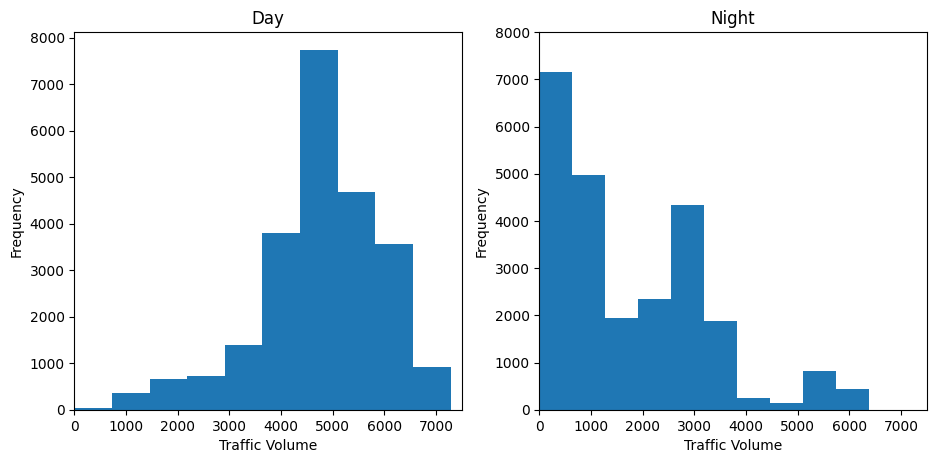

In [14]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,7500])
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,7500])
plt.ylim([0,8000])
plt.show()

In [15]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [16]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Looking at the histogram, it is observed that the traffic is more intense during the day (7 - 19) than at night (19 - 7). Histogram graphs are in the form of increasing during the day and decreasing at night. We will continue to analyze our data and find the indicators, considering only the time during daylight hours. One of the reasons for heavy traffic is time.

## Time Indicators

In [17]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()

In [18]:
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


In [19]:
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

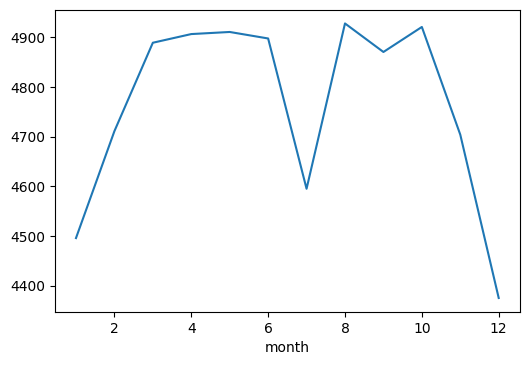

In [91]:
by_month['traffic_volume'].plot.line()
plt.show()

When you analyze it by months, we come across an interesting data. Although there is a lot of traffic during the summer months, it experiences a sudden decrease between June and July and then catches a sudden exit. While traffic density increases in the spring months, it decreases in the winter months.

In [21]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()

In [22]:
by_dayofweek

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
dayofweek,,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286,6.401243
1,282.301770,0.129172,0.000194,52.333234,5189.004782,6.458757
2,282.198316,0.068099,0.001091,53.662119,5284.454282,6.619158
3,282.279115,0.172436,0.000148,53.993191,5311.303730,6.501184
4,282.181216,0.092828,0.000225,51.412200,5291.600829,6.575067
5,282.300646,0.107596,0.000094,50.446376,3927.249558,6.498821
6,282.280340,0.133170,0.000000,52.288699,3436.541789,6.604179


In [23]:
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

In [24]:
#0 is Monday, 6 is Sunday

## Time Indicators (II)

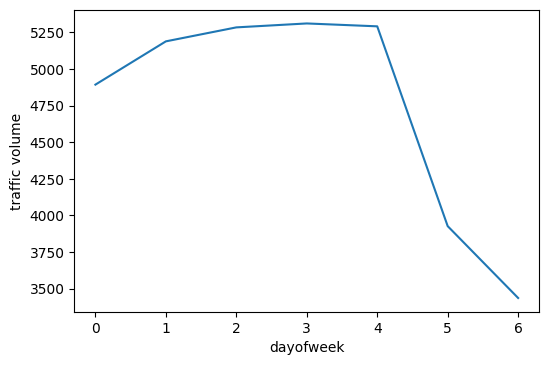

In [90]:
by_dayofweek['traffic_volume'].plot.line()
plt.ylabel('traffic volume')
plt.show()

There is a big difference in traffic density between working days and weekends. The busiest times of traffic stand out as working days.

## Time Indicators (III)

In [26]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4]      # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5]      # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


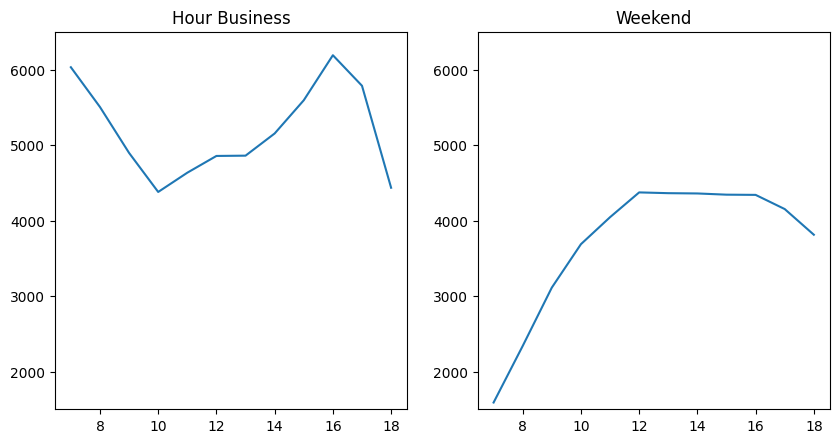

In [27]:
plt.figure(figsize=(10,5))
days_list = [by_hour_business,by_hour_weekend]
titles = ['Hour Business','Weekend']
for i,dh in zip(range(1,3),days_list):
    if i == 1:
        plt.subplot(1,2,i)
        plt.plot(dh['traffic_volume'])
        plt.title(titles[i-1])
        plt.ylim([1500,6500])
    else:
        plt.subplot(1,2,i)
        plt.plot(dh['traffic_volume'])
        plt.title(titles[i-1])
        plt.ylim([1500,6500])
plt.show()

In [28]:
by_hour_business['traffic_volume'].min()

4378.419117647059

In [29]:
by_hour_weekend['traffic_volume'].max()

4372.482882882883

The busiest hours on workdays seem to be 7 am and 4 pm. On weekends, there is the lowest traffic density at 7 am. While there is a decrease in traffic density from 7 a.m. to 10 a.m. on working days, it increases from 7 a.m. to 12 noon on weekends. Even though the traffic was at its peak at 12 o'clock on weekends, it could not exceed the lowest traffic density comparing on working days. To summarize briefly; traffic density varies according to months, days and hours. It may be because it coincides with the exit from work. Because it supports our data at 7 am and usually people set out to go to work at that time. I guess the busiest times are around 16:00 on Thursdays in August. The sharp decline in June - July may be because working people usually take their leave in those months.

## Weather Indicators

In [60]:
for value in day.describe().columns:
    print(value,day['traffic_volume'].corr(day[value]))

temp 0.12831656852303905
rain_1h 0.0036965098350734324
snow_1h 0.001265349847175986
clouds_all -0.03293234866163948
traffic_volume 1.0
month -0.02233733768722749
dayofweek -0.4164532389200683
hour 0.1727040238262713


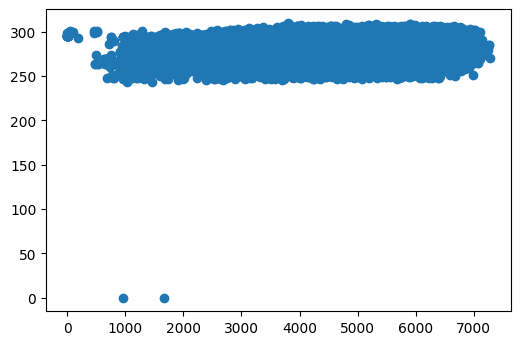

In [89]:
plt.scatter(x=day['traffic_volume'],y=day['temp'])
plt.show()

In [64]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

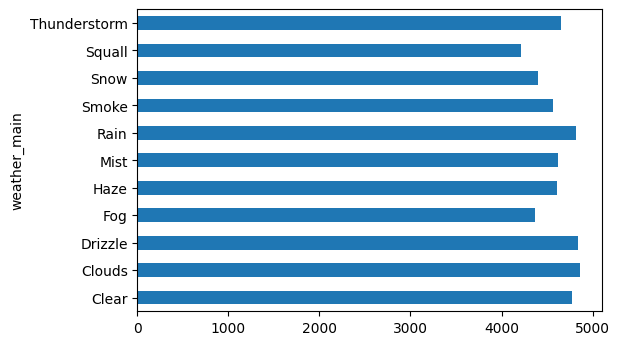

In [88]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

In any weather condition, a situation exceeding 5000 vehicles is not observed. There are three values close to 5000. These are Rain, Drizzle and Clouds.

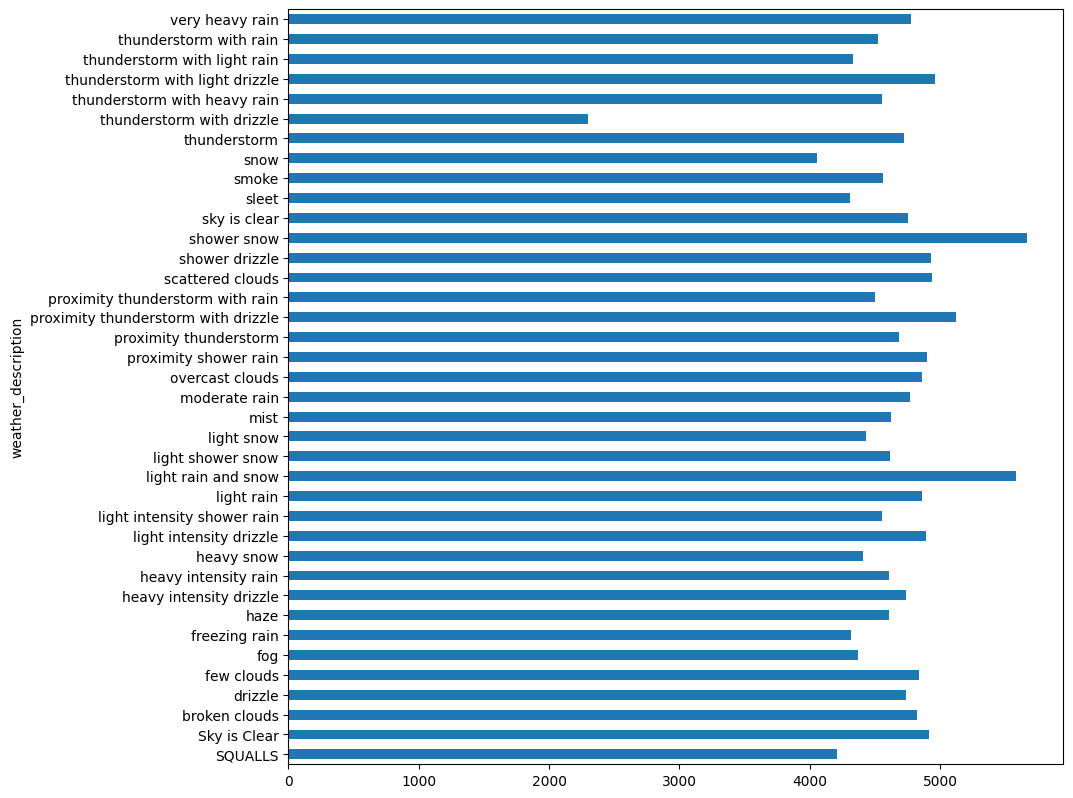

In [87]:
by_weather_description['traffic_volume'].plot.barh(figsize=(10,10))
plt.show()

There are three weather descriptions that exceed 5000 vehicles. These are shower snow, light rain and snow and proximity tunderstorm with drizzle. Snow and rain are indicators of traffic increase.

Let's summarize the data; Months, days, day and night, hours, weather description have an effect on traffic density. 
- Warm weather has more traffic than cold weather. 
- The traffic on working days is more intense than on weekends.
- There is heavy traffic during the day compared to the night.
- Traffic is very heavy during working hours. (7-16)
- Traffic density is higher in shower snow, light rain and snow and proximity thunderstorm with drizzle weather conditions compared to other weather conditions.